# Purwadhika Job Connector Data Science Final Project

[Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) dataset from [kaggle.com](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset) is used for this project. This dataset will be used to train machine learning model that can be used to predict whether a patient with the given profile will have a risk of Coranary Heart Disesase ([CHD](https://www.medicalnewstoday.com/articles/184130.php)) in the next ten years or not. 

Import some packages that are commonly use in data science. Another packages will be imported later as we need it.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read dataset using pandas read_csv method.

In [2]:
data = pd.read_csv('../dataset/framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Explanation of Variables

**Demographic**: 
- male: sex of respondent (0 = female; 1 = male) (Nominal)
- age: age of the patient (Continuous - but in this dataset it is showed as whole number)
- education: education level (1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college) (Ordinal)

**Behavioural**:
- currentSmoker: whether or not the patient is a current smoker (Nominal)
- cigsPerDay: the number of cigarettes that the person smoked on average in one day.(Continuous)

**Medical (history)**:
- BPMeds: whether or not the patient was on blood pressure medication (Nominal)
- prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
- prevalentHyp: whether or not the patient was hypertensive (Nominal)
- diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current)**:
- totChol: total cholesterol level (Continuous)
- sysBP: systolic blood pressure (Continuous)
- diaBP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- heartRate: heart rate (Continuous)
- glucose: glucose level (Continuous)

**Target**:
- TenYearCHD: 10 year risk of coronary heart disease CHD (binary: 0 = No; 1 = Yes)

In [5]:
data[['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].describe()

,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000
mean,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655
std,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335
min,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Exploratory Data Analysis

Looking correlations in the dataset.

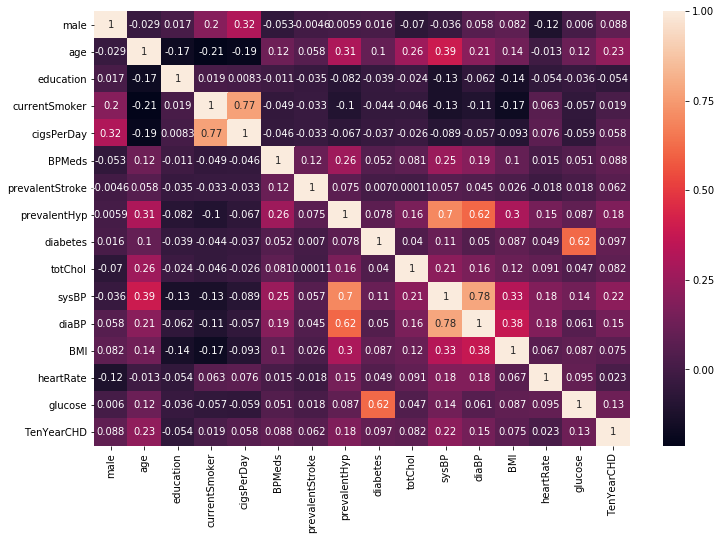

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

It looks like diabetes has strong correlation with glucose level, which is we already knew by knowledge. Also systolic and diastolic blood presssure and hypertensive. But none of the feature has very strong correlation with our target (TenYearCHD).

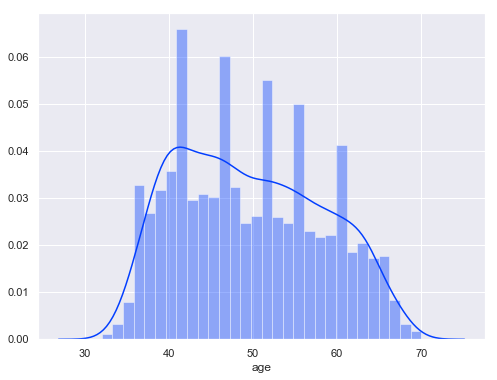

In [7]:
mpl.rcParams['figure.figsize'] = (8,6)
sns.set(style='darkgrid', palette='bright')
sns.distplot(data['age'], bins=30)

It's look like the age of respondents uniformly distributed.

We will do some data visualization to see correlation between features that already mentioned above. 

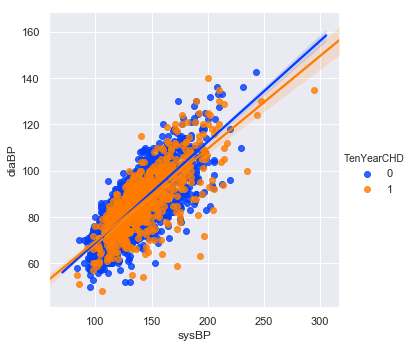

In [8]:
sns.lmplot(x='sysBP', y='diaBP', data=data, hue='TenYearCHD')

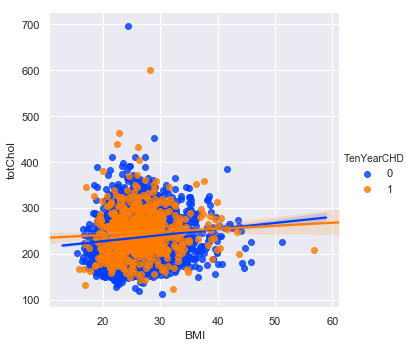

In [9]:
sns.lmplot(x='BMI', y='totChol', data=data, hue='TenYearCHD')

Now we will see the likeliness of TenYearCHD on our dataset.

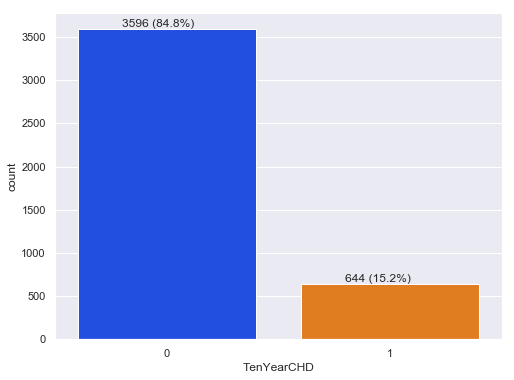

In [10]:
ax = sns.countplot(data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['TenYearCHD'])), 
                    (p.get_x()+0.2, p.get_height()+15))

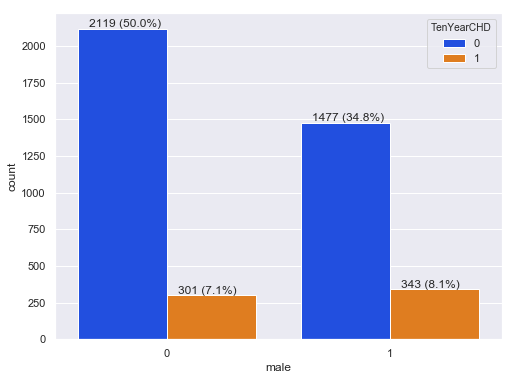

In [11]:
ax = sns.countplot(data['male'], hue=data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['male'])), 
                    (p.get_x()+0.05, p.get_height()+10))

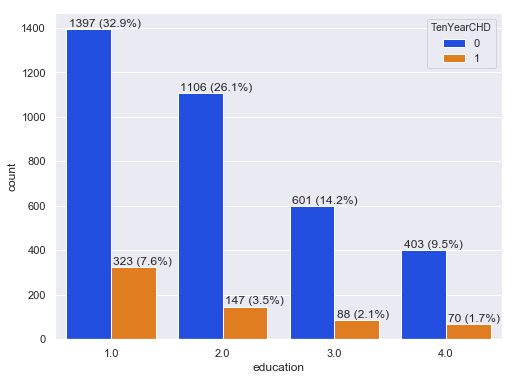

In [12]:
ax = sns.countplot(data['education'], hue=data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['education'])), 
                    (p.get_x()+0.02, p.get_height()+10))

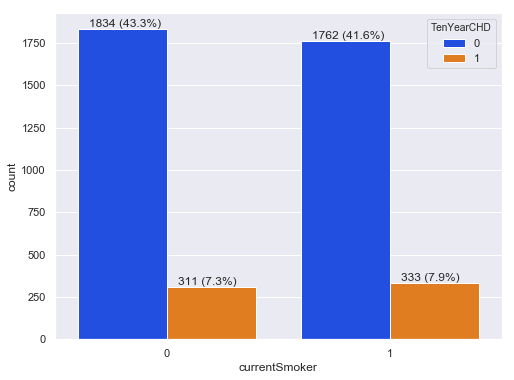

In [13]:
ax = sns.countplot(data['currentSmoker'], hue=data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['currentSmoker'])), 
                    (p.get_x()+0.05, p.get_height()+10))

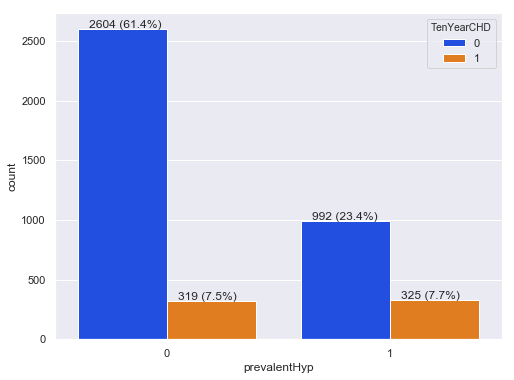

In [14]:
ax = sns.countplot(data['prevalentHyp'], hue=data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['prevalentHyp'])), 
                    (p.get_x()+0.05, p.get_height()+10))

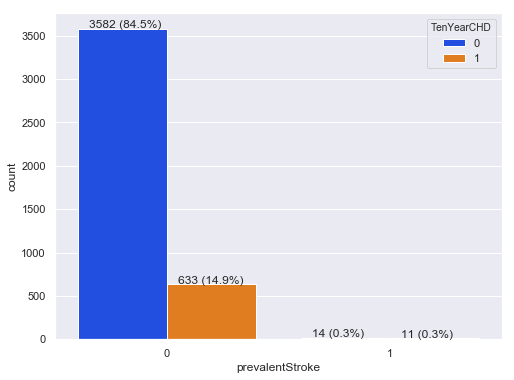

In [15]:
ax = sns.countplot(data['prevalentStroke'], hue=data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['prevalentStroke'])), 
                    (p.get_x()+0.05, p.get_height()+10))

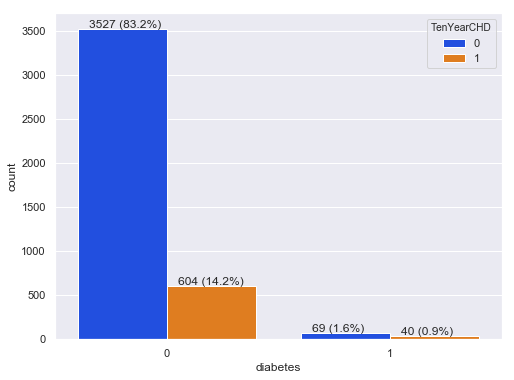

In [16]:
ax = sns.countplot(data['diabetes'], hue=data['TenYearCHD'])
for p in ax.patches:
        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100* p.get_height()/len(data['diabetes'])), 
                    (p.get_x()+0.05, p.get_height()+10))

## Data Preprocessing 

It seems like most of the respondent doesn't have risk of CHD in the next ten years. It looks like there is not some significant factor that makes person has a risk of CHD in ten years based on dataset. 

So to train the machine learning model I choose to drop the column of education and glucose because it has many missing values. 
Glucose also has strong correlation with diabetes, so diabetes feature can represent glucose feature.

In [17]:
data.drop(['education', 'glucose'], axis=1, inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


For remaining null values we will see how many rows do we have null values. Is it much enough to be considered or not?

In [18]:
null_row = 0

for i in data.isnull().sum(axis=1):
    if i > 0:
        null_row += 1

print('Missing row = {} %'.format(round(null_row/len(data)*100, 2)))

Missing row = 3.54 %


Since the percentage of missing value is very low, I will exclude the missing value

In [19]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [20]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [21]:
from sklearn.model_selection import train_test_split
seed = np.random.seed(121)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training Machine Learning Model

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

### K - Nearest Neighbors (KNN)

Text(0, 0.5, 'Error Rate')

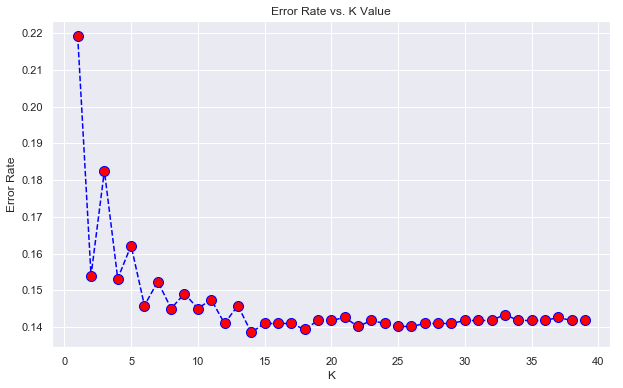

In [24]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Based off the result above, I will choose 14 as a number of neighbors.

In [25]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

### Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [27]:
svc = SVC(C=100, gamma=0.0001)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

Now I would like to compare the classification report between these models. After that I will choose the best model using K-Fold Cross Validation.

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print('Random Forest Classifier \n', classification_report(y_test, rfc_predictions))
print('Logistic Regression \n', classification_report(y_test, logreg_predictions))
print('KNN \n', classification_report(y_test, knn_predictions))
print('SVM \n', classification_report(y_test, svc_predictions))

Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1054
           1       0.37      0.09      0.14       173

    accuracy                           0.85      1227
   macro avg       0.62      0.53      0.53      1227
weighted avg       0.80      0.85      0.81      1227

Logistic Regression 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1054
           1       0.44      0.04      0.07       173

    accuracy                           0.86      1227
   macro avg       0.65      0.52      0.50      1227
weighted avg       0.80      0.86      0.80      1227

KNN 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1054
           1       0.80      0.02      0.04       173

    accuracy                           0.86      1227
   macro avg       0.83      0.51      0.49      1227
weighted avg       

In [29]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(5, random_state=121)

rfc_score = round(np.mean(cross_val_score(rfc, X, y, cv=kf)), 3)
logreg_score = round(np.mean(cross_val_score(logreg, X, y, cv=kf)), 3)
knn_score = round(np.mean(cross_val_score(knn, X, y, cv=kf)), 3)
svm_score = round(np.mean(cross_val_score(svc, X, y, cv=kf)), 3)

print('Random Forest Score = {} \nLogistic Regression Score = {} \nKNN Score = {} \nSVM Score = {}'
      .format(rfc_score, logreg_score, knn_score, svm_score))

Random Forest Score = 0.838 
Logistic Regression Score = 0.853 
KNN Score = 0.85 
SVM Score = 0.85


Because Logistic Regression has the highest score, so I continue to build my model using Logistic Regression.

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, logreg_predictions))
print(classification_report(y_test, logreg_predictions))

[[1045    9]
 [ 166    7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1054
           1       0.44      0.04      0.07       173

    accuracy                           0.86      1227
   macro avg       0.65      0.52      0.50      1227
weighted avg       0.80      0.86      0.80      1227



To better visualize our result, let's plot the confusion matrix.

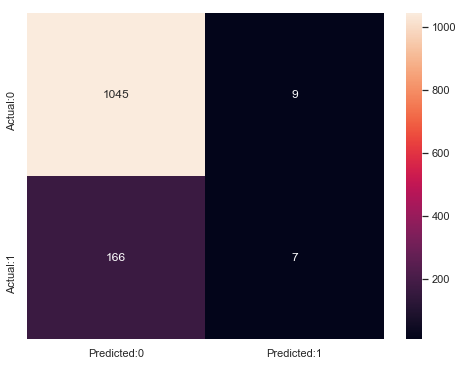

In [31]:
cm = confusion_matrix(y_test, logreg_predictions)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d')

As we can see at the beginning, we have an unbalanced dataset. There is a lot more respondent without a risk of TenYearCHD (0 value). So the model will good at predicted 'Negative' result but not 'Positive' result (specific model). Therefore the model has quite a lot Type II Error (False Negative). Which is not what we want in case of disease prediction. So I will lowering the treshold of classification.

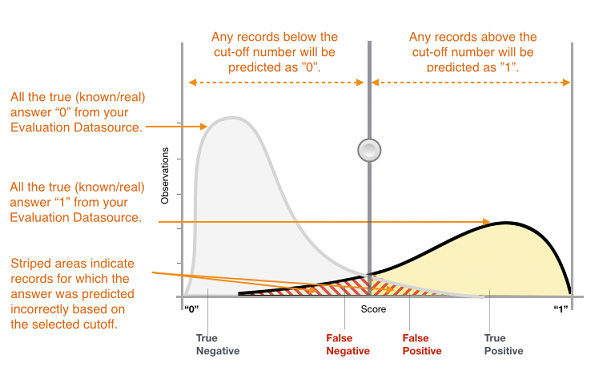(source: https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html1563507988311440)

In [34]:
from sklearn.preprocessing import binarize
for i in range(1,6):
    cm2=0
    pred_prob = logreg.predict_proba(X_test)
    new_pred = binarize(pred_prob, i/10)[:,1]
    cm2 = confusion_matrix(y_test,new_pred)
    TN=cm2[0,0]
    TP=cm2[1,1]
    FN=cm2[1,0]
    FP=cm2[0,1]
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)
    print('Treshold: {}; Type II errors(False Negative): {} \nSpecificity: {} , Sensitivity: {}.\n'.format(i/10, cm2[1,0], specificity, sensitivity))

Treshold: 0.1; Type II errors(False Negative): 32 
Specificity: 0.43263757115749524 , Sensitivity: 0.815028901734104.

Treshold: 0.2; Type II errors(False Negative): 90 
Specificity: 0.7893738140417458 , Sensitivity: 0.4797687861271676.

Treshold: 0.3; Type II errors(False Negative): 139 
Specificity: 0.926944971537002 , Sensitivity: 0.19653179190751446.

Treshold: 0.4; Type II errors(False Negative): 160 
Specificity: 0.9705882352941176 , Sensitivity: 0.07514450867052024.

Treshold: 0.5; Type II errors(False Negative): 166 
Specificity: 0.99146110056926 , Sensitivity: 0.04046242774566474.



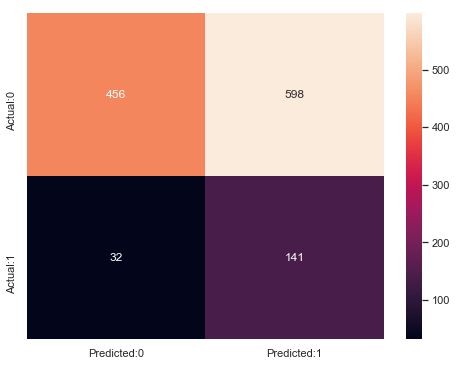

In [33]:
pred_prob = logreg.predict_proba(X_test)
new_pred = binarize(pred_prob, 0.1)[:,1]
cm2 = confusion_matrix(y_test,new_pred)
conf_matrix = pd.DataFrame(data=cm2, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d')

So based on this dataset in order to minimize the cost of Type II Error I choose the treshold 0.1. It will be better that the patient is predicted has a risk and after further observation the actual result is not have rather than the opposite.

PS: what user need to input for prediction = 
['male' 'age' 'currentSmoker' 'cigsPerDay' 'BPMeds' 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP' 'BMI' 'heartRate']